Importing tensorflow and keras

In [0]:
import tensorflow as tf
from tensorflow import keras

Importing numpy

In [0]:
import numpy as np
import matplotlib.pyplot as plt


Check tensorflow version

In [3]:
print(tf.__version__)

2.2.0-rc3


Importing Fashion MNIST dataset from keras

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

Loading the dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Assigning class names

In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
               'Shirt','Sneaker','bag','Ankle boot']
               

Train image details

In [7]:
train_images.shape

(60000, 28, 28)

Training imageset size

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Testing dataset size

In [10]:
len(test_labels)

10000

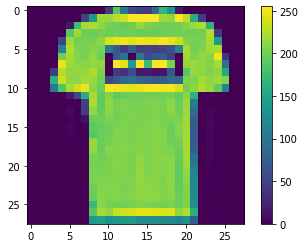

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images /255.0

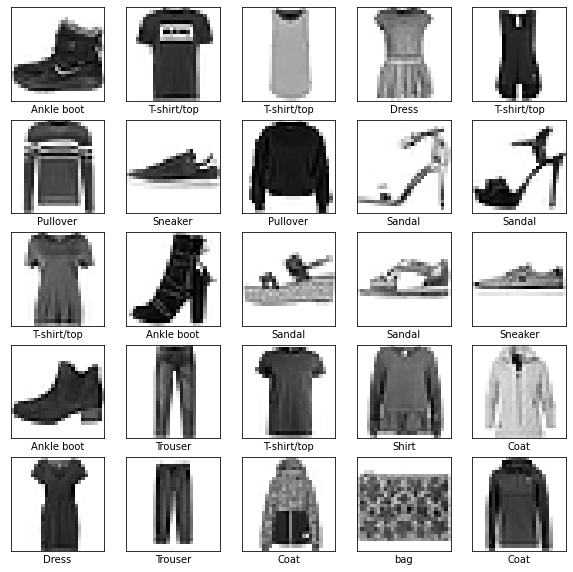

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Creating CNN (3 layered)

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)                          
])

Defining Loss Function

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5006 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3774 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2487 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

Testing model accuracy

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8774
Test accuracy: 0.8773999810218811


Prediction

In [0]:
predictions = model.predict(test_images)

In [19]:
predictions[100]

array([2.4834054e-02, 1.4002212e-04, 1.4947884e-04, 9.7068328e-01,
       1.6224227e-04, 5.2343481e-08, 4.0190960e-03, 4.1582324e-12,
       1.0823731e-05, 9.2018985e-07], dtype=float32)

In [20]:
np.argmax(predictions[100])

3

In [21]:
test_labels[100]

3

Defining function for graphical representation

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})" .format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
  
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')


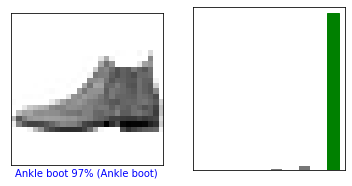

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

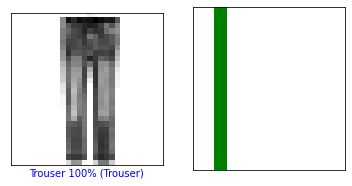

In [24]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

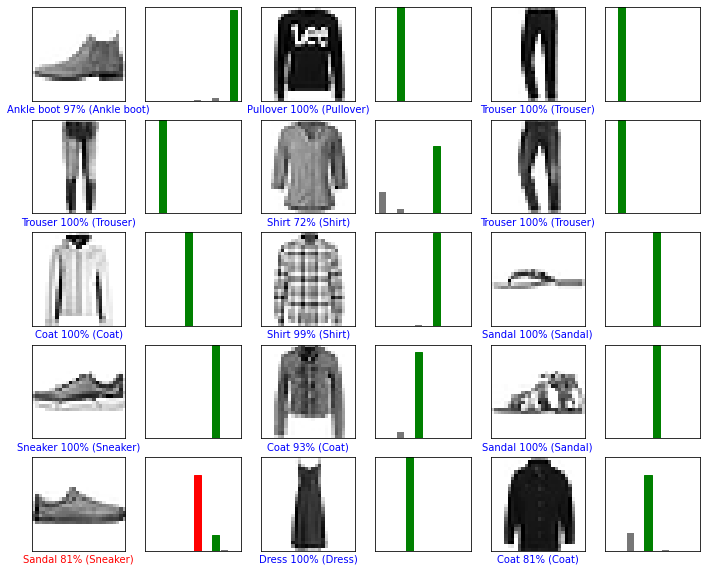

In [25]:
 num_rows = 5
 num_cols = 3
 num_images = num_rows*num_cols
 plt.figure(figsize=(2*2*num_cols, 2*num_rows))
 for i in range(num_images):
   plt.subplot(num_rows, 2*num_cols, 2*i+1)
   plot_image(i, predictions, test_labels, test_images)
   plt.subplot(num_rows, 2*num_cols, 2*i+2)
   plot_value_array(i, predictions, test_labels)
 plt.show()

In [0]:
k=15

(28, 28)


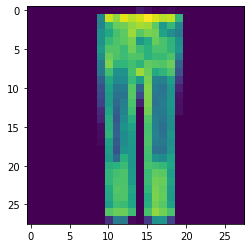

In [27]:
img = test_images[k]

print(img.shape)
plt.imshow(test_images[k])

In [28]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)
print(predictions_single)

[[5.0922341e-07 9.9997640e-01 7.9229999e-08 1.7712870e-05 5.1434740e-06
  2.4719972e-12 5.3643454e-08 2.0475739e-14 4.5915867e-09 4.8547489e-11]]


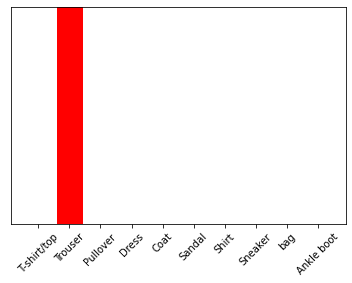

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

1